In [ ]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.8.0 Tensorflow Current Version: 2.18.0


In [ ]:
# !pip uninstall tf-keras

In [ ]:
# !pip install tensorflow==2.16.1

# Imports and Settings

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from tensorflow.keras import optimizers, metrics


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

random.seed(46)
np.random.seed(46)
tf.random.set_seed(46)


# Functions

In [ ]:
def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()


def get_best_epoch_details(history):
    val_losses = history.history['val_loss']
    min_val_loss_index = val_losses.index(min(val_losses))
    best_epoch = min_val_loss_index + 1

    epoch_details = {}
    for key in history.history.keys():
        epoch_details[key] = history.history[key][min_val_loss_index]

    epoch_details['best_epoch'] = best_epoch
    return epoch_details

def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):

    if batch_size is None:
        batch_size = len(X_train)

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)

    return train_dataset, val_dataset


# Data Preprocess, Train Validation and Tensorflow Dataset

In [ ]:
X, y =  load_breast_cancer(return_X_y=True)

In [ ]:
data = load_breast_cancer()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [ ]:
batch_size =32

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=len(X_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(buffer_size=len(X_val)).batch(batch_size)


# Model

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(1,activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=SGD(),
              loss = "binary_crossentropy",
              metrics = ["accuracy", metrics.AUC(name="auc")])

In [ ]:
early_stopping = EarlyStopping(
    monitor = "val_auc",
    patience = 25,
    mode = "max",
    restore_best_weights = True
)

In [ ]:
history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks = [early_stopping])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.1845 - auc: 0.1235 - loss: 0.8696 - val_accuracy: 0.6053 - val_auc: 0.7159 - val_loss: 0.6544
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6516 - auc: 0.7100 - loss: 0.6359 - val_accuracy: 0.8596 - val_auc: 0.9355 - val_loss: 0.5014
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - auc: 0.8969 - loss: 0.5115 - val_accuracy: 0.9123 - val_auc: 0.9748 - val_loss: 0.4112
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8882 - auc: 0.9434 - loss: 0.4206 - val_accuracy: 0.9474 - val_auc: 0.9861 - val_loss: 0.3517
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9195 - auc: 0.9711 - loss: 0.3603 - val_accuracy: 0.9649 - val_auc: 0.9897 - val_loss: 0.3107
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9324 - auc: 0.9795 - loss: 0.3130 - val_accuracy: 0.9649 - val_auc: 0.9920 - val_loss: 0.2800
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [ ]:
get_best_epoch_details(history)

{'accuracy': 0.9714285731315613,
 'auc': 0.9943414330482483,
 'loss': 0.106902115046978,
 'val_accuracy': 0.9824561476707458,
 'val_auc': 0.9983622431755066,
 'val_loss': 0.08790358155965805,
 'best_epoch': 48}

accuracy artarken loss azalmış yani underfitting olmamış , val accuracy baktığımızda 0.60 dan 0.98 çıkmış val_loss da 0.11 den 0.08 ya düşmüş ilk başta early stoppingi  5 yapmıştım ve 10 . epoch da durdu ve verebeiliceği performanstan az sonuç verdi daha sonra 205 yaptım ve 0.98 ye ulaştı .

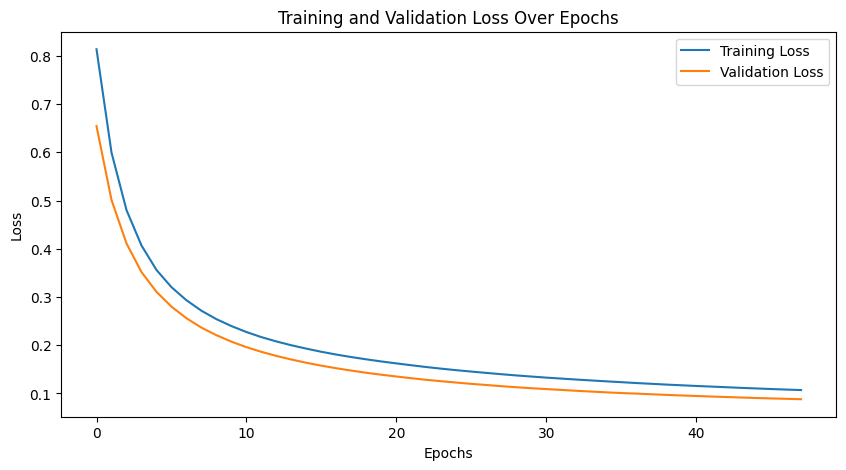

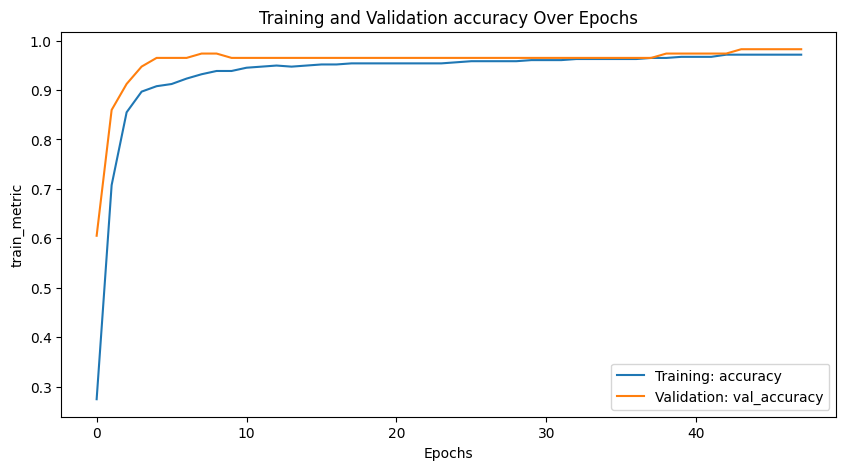

In [ ]:
plot_training_history(history)

bu grafiklere baktığımda trning ve val loss öncelikle azalıyor yani bu iyi bir şey diğer yandan da accuracylere baktığımda onlarda artmış bu durumda  overfitting olduğunu düşünmüyorum.Düzgün bir tablo bence.

bence model aşırı öğrenme yapmadı zaten aşırı öğrenme yapmaması için early stopping kullandık. Bence önmeli olan burda  early stoppinging kaç tekrardan sonra artık durması gerektiğini anlayacağı parametre çünkü 50 yaptığımda son epochlara doğru  accuracy hiç artmamaya, sabit kalmaya başladı ama bu süreçte de val_loss düşmeye devam ediyordu.
